In [194]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

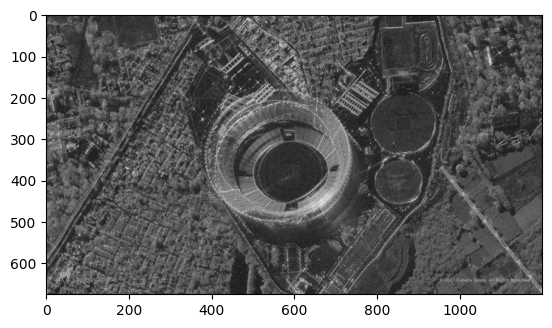

In [195]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.show()

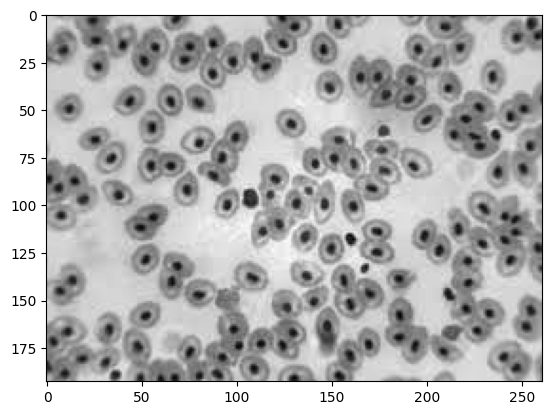

In [196]:
image1 = cv2.imread('cells_2.jpg')
image_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray1, cmap="gray")
plt.show()

In [197]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.
# Зашумить изображение 2 при помощи шума типа соль-перец.
# Исследовать, как влияет частота шума на качество работы морфологических операций открытие/закрытие.

# Зашумить изображение при помощи шума гаусса, постоянного шума.

In [198]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[ 23,   0,  52, ...,  58,   0,  52],
       [ 47,   0,   0, ...,   0,   0,   0],
       [  0,  25, 119, ...,  17,  56,  57],
       ...,
       [190,  15,   0, ..., 119,  51,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 45,  49,   0, ...,  29,   0,   0]], dtype=uint8)

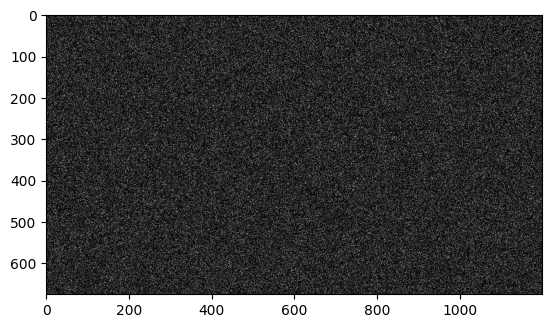

In [199]:
plt.imshow(noise_gauss, cmap="gray")
plt.show()

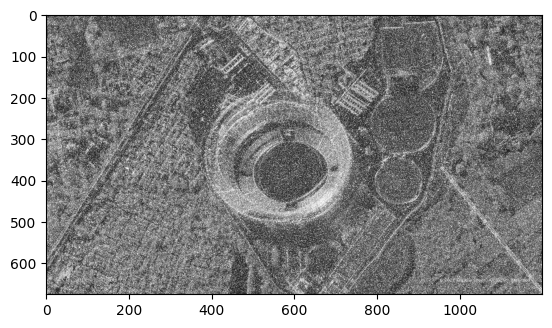

In [200]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)  # наложение шума на изображение
plt.imshow(image_noise_gauss, cmap="gray")
plt.show()

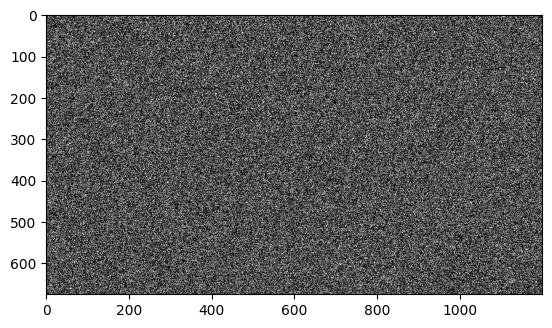

In [201]:
# Постоянный шум
uni_noise=np.zeros(image_gray.shape, np.uint8)
cv2.randn(uni_noise,0,255)
uni_noise=(uni_noise*0.5).astype(np.uint8)
plt.imshow(uni_noise, cmap="gray")
plt.show()

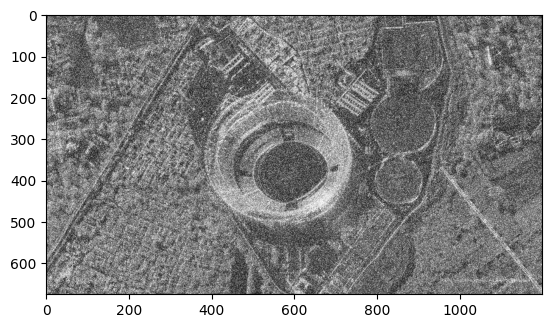

In [202]:
image_nois_uni = cv2.add(image_gray,uni_noise) # наложение шума на изображение
plt.imshow(image_nois_uni, cmap="gray")
plt.show()

# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

In [203]:
# Фильтр Гаусса
from skimage.metrics import structural_similarity, mean_squared_error

# Mедианный фильтр
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

# Билатеральный фильтр
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)

# Фильтр нелокальных средних с различными параметрами
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)

# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [204]:
# Оценка результатов фильтрации
# Для каждого фильтра рассчитываем SSIM и MSE

mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim_gauss, _) = structural_similarity(image_gray, image_noise_gauss, full=True)
print("Фильтр Гаусса MSE:", mse_gauss, "SSIM:", ssim_gauss)

mse_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_median, _) = structural_similarity(image_gray, image_gauss_median, full=True)
print("Медианный фильтр MSE:", mse_median, "SSIM:", ssim_median)

mse_bilat = mean_squared_error(image_gray, image_gauss_bilat)
(ssim_bilat, _) = structural_similarity(image_gray, image_gauss_bilat, full=True)
print("Билатериальный фильтр MSE:", mse_bilat, "SSIM:", ssim_bilat)

mse_nlm = mean_squared_error(image_gray, image_gauss_nlm)
(ssim_nlm, _) = structural_similarity(image_gray, image_gauss_nlm, full=True)
print("Фильтр нелокальных средних MSE:", mse_nlm, "SSIM:", ssim_nlm)

Фильтр Гаусса MSE: 4219.287662962963 SSIM: 0.1875406166110974
Медианный фильтр MSE: 1028.5219283950617 SSIM: 0.4297814165846413
Билатериальный фильтр MSE: 1831.0438543209877 SSIM: 0.31494925654994005
Фильтр нелокальных средних MSE: 4214.846219753086 SSIM: 0.1879542095638936


# Зашумить изображение 2 при помощи шума типа соль-перец.

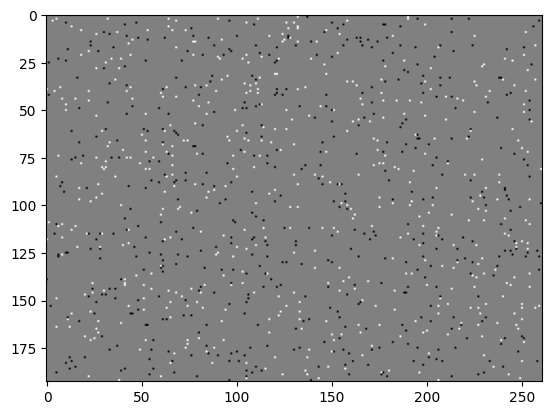

In [205]:
# 4. Зашумить изображение 2 при помощи шума типа соль-перец.
# Salt and pepper. Генерируем равномерный шум от 0 до 101 и из всех сохраняем только координаты, где шум принимает значение 0 и 100
noise =  np.random.randint(0, 101, size = (image1.shape[0], image1.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)
bg_image = np.ones(image1.shape, np.uint8) * 128
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255
plt.imshow(bg_image, cmap="gray")
plt.show()

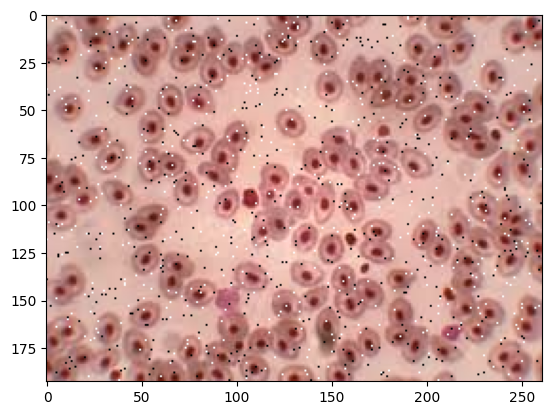

In [206]:
import copy

image_sp = copy.deepcopy(image1)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255
plt.imshow(image_sp, cmap="gray")
plt.show()

# Исследовать, как влияет частота шума на качество работы морфологических операций открытие/закрытие.

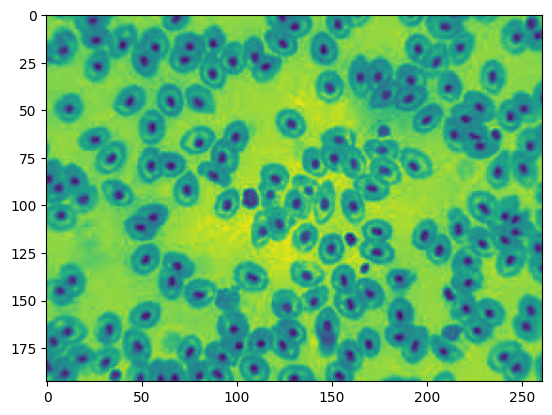

In [207]:
image2 = cv2.imread('cells_2.jpg')
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) # конвертируем изображение в оттенки серого
plt.imshow(image2_gray)
plt.show()

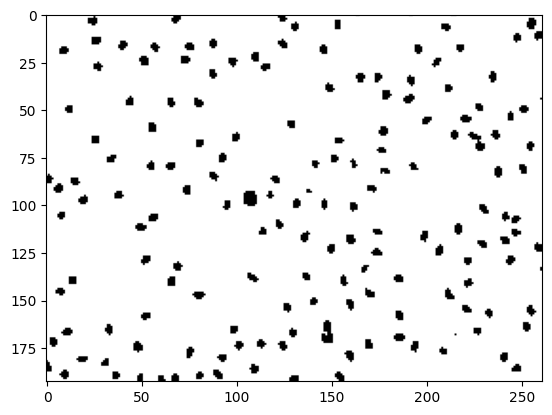

In [208]:
_,th = cv2.threshold(image2_gray,80,255,cv2.THRESH_BINARY)  # отбиниризуем изображение, применим простейшую пороговую фильтрацию
# выделены только ядра исходных клеток, все остальное обращено в ноль
plt.imshow(th, cmap="gray")
plt.show()

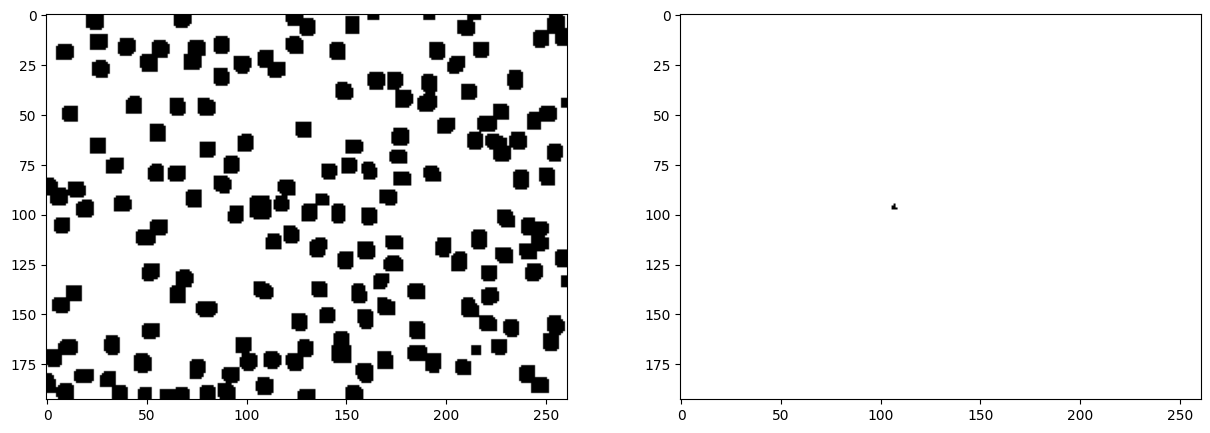

In [209]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(th,kernel,iterations = 1) # коррозия уменьшает размер белой области, увеличивает черную
plt.imshow(erosion, cmap="gray")

plt.subplot(1, 2, 2)
dilation = cv2.dilate(th,kernel,iterations = 1)
plt.imshow(dilation, cmap="gray")               # увеличивает размер белой области уменьшает черные,
# результут при ядре 5 на 5 и количеством итераций 1

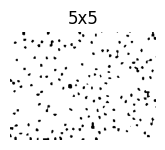

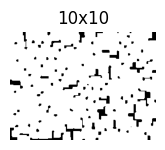

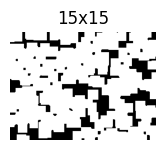

In [210]:
#Открытие
plt.subplot(1, 3, 1)
opening = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel) # исходное (5,5)
plt.imshow(opening, cmap="gray")
plt.axis('off')
plt.title('5x5')
plt.show()

plt.subplot(1, 3, 2)
kernel1 = np.ones((10,10),np.uint8)
opening1 = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel1)
plt.imshow(opening1, cmap="gray")
plt.axis('off')
plt.title('10x10')
plt.show()

plt.subplot(1, 3, 3)
kernel2 = np.ones((15,15),np.uint8)
opening2 = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel2)
plt.imshow(opening2, cmap="gray")
plt.axis('off')
plt.title('15x15')
plt.show()

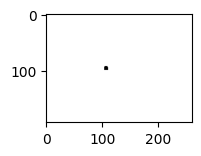

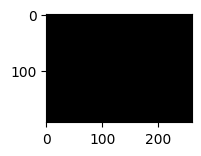

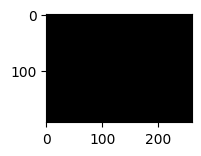

In [211]:
#Закрытие
plt.subplot(1, 3, 1)
closing = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap="gray") # оставило только одну точку
plt.show()

plt.subplot(1, 3, 2)
closing1 = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel1)
plt.imshow(closing1, cmap="gray") # оставило только одну точку
plt.show()

plt.subplot(1, 3, 3)
closing2 = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel2)
plt.imshow(closing2, cmap="gray") # оставило только одну точку
plt.show()